DATA VISUALIZATION- Using Matplotlib, Seaborn to include


*   pair plot
*   violin plot
*   boxen plot
*   heatmap










Head
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                 

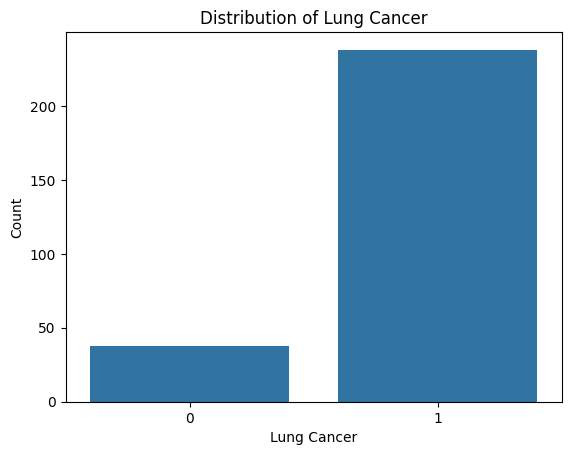

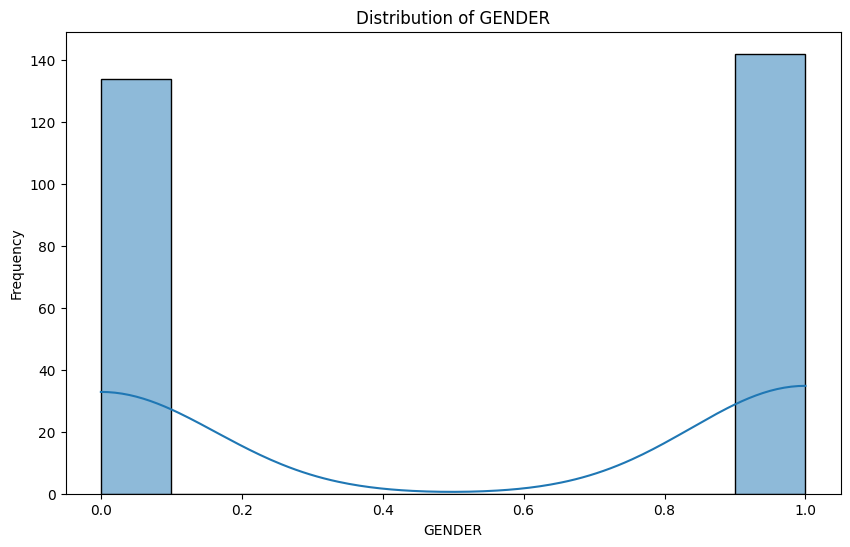

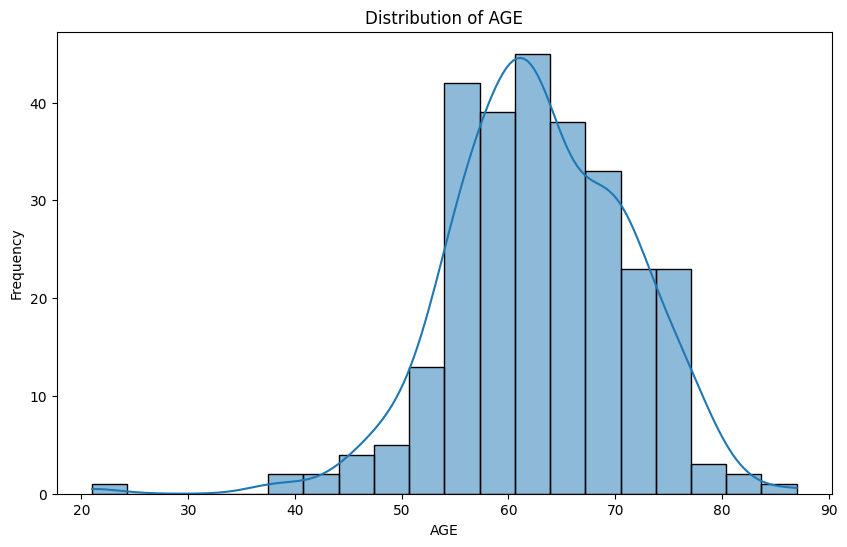

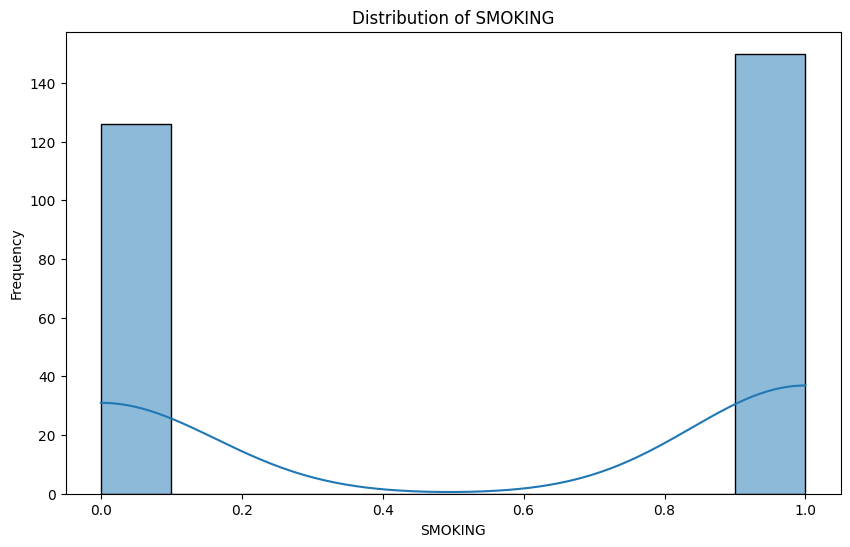

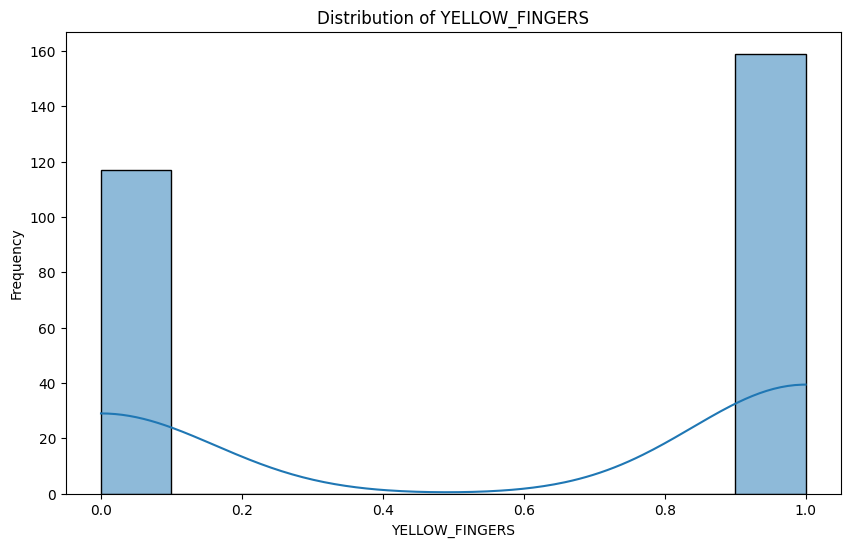

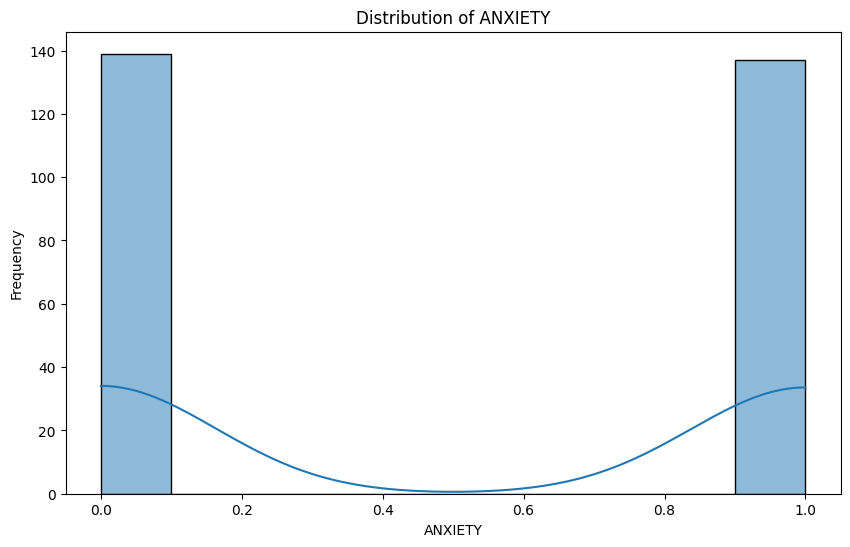

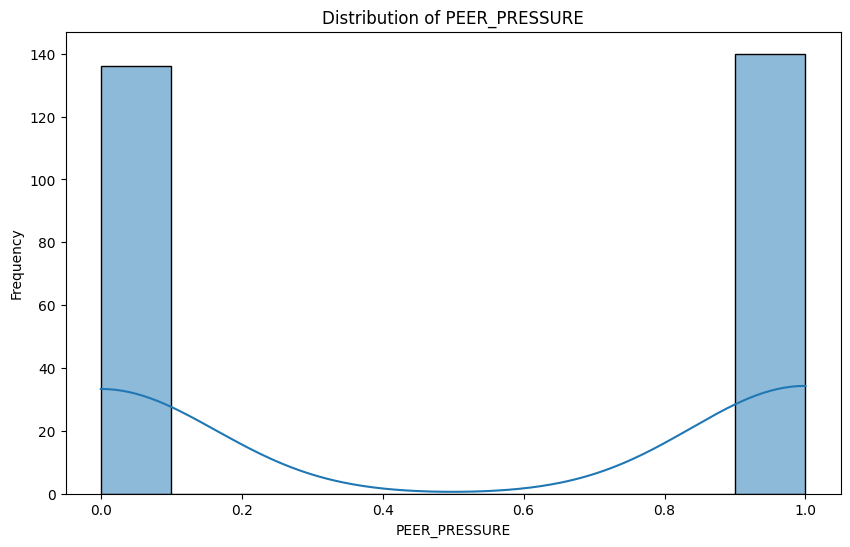

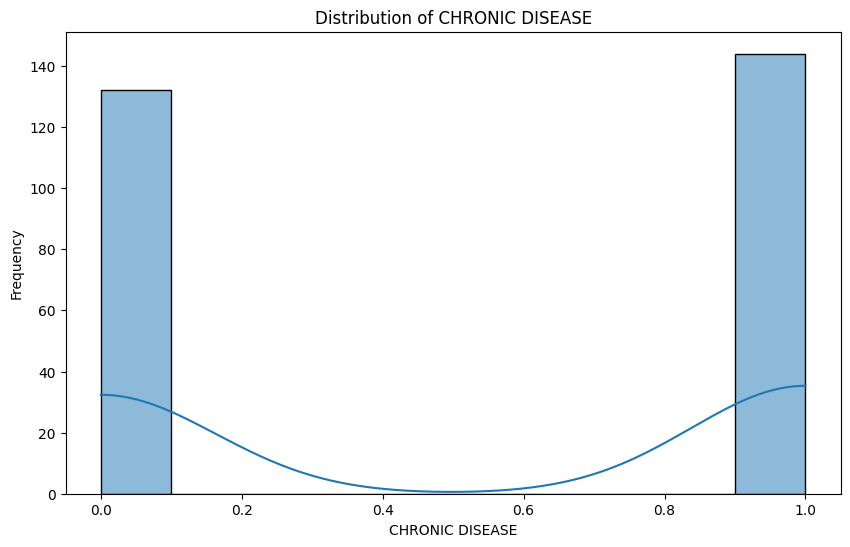

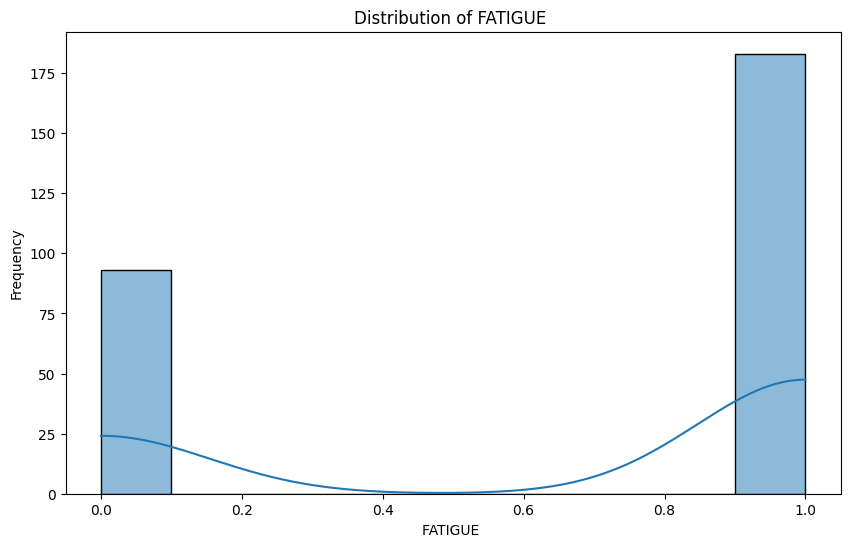

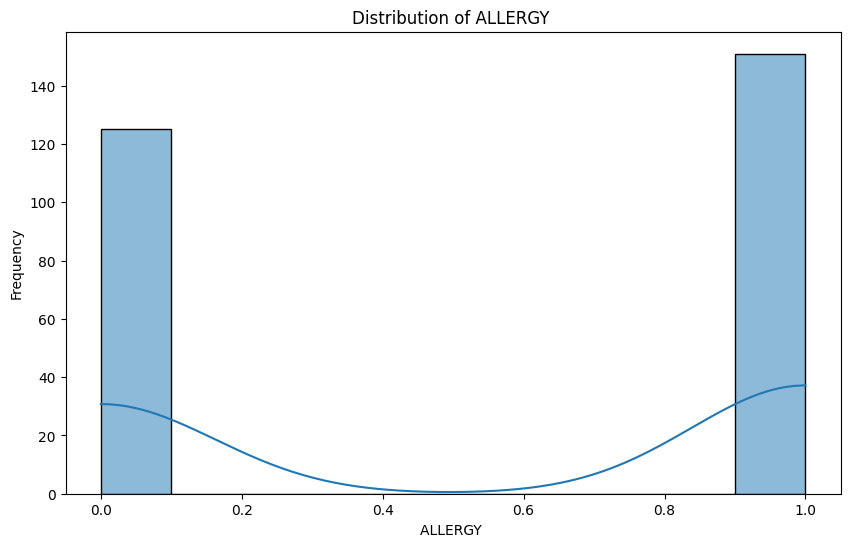

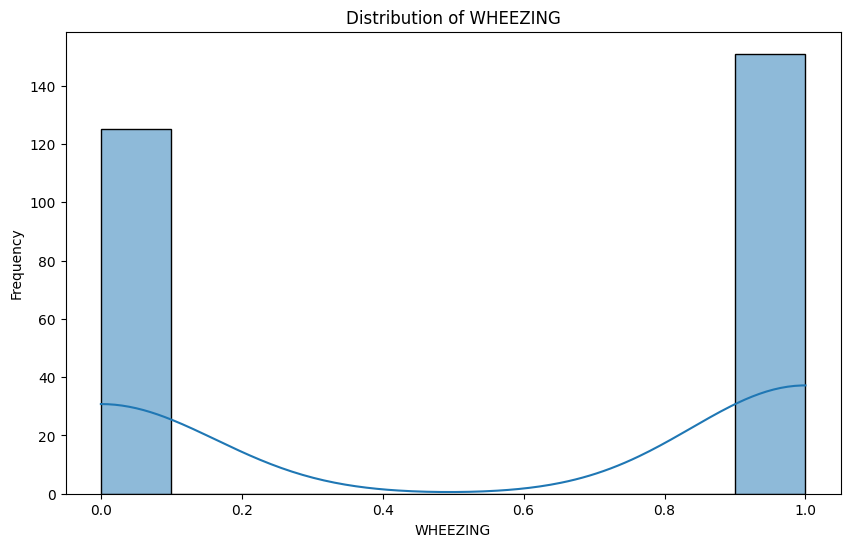

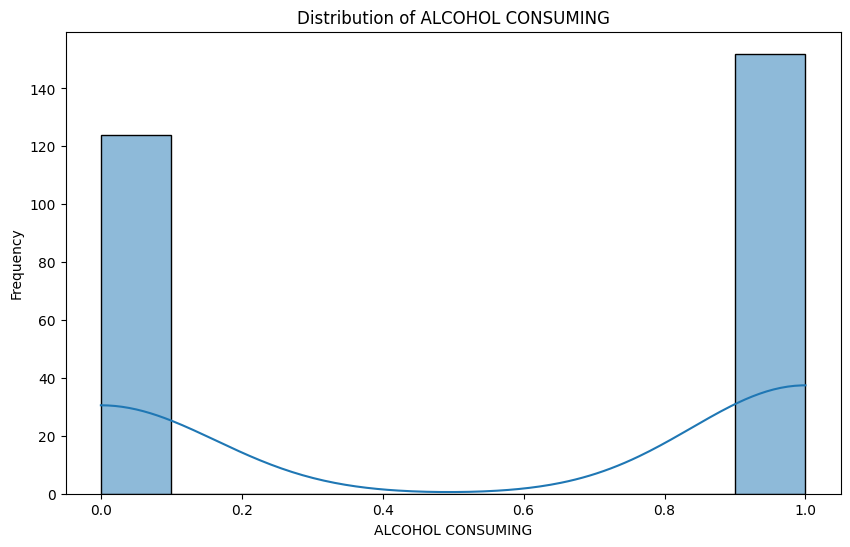

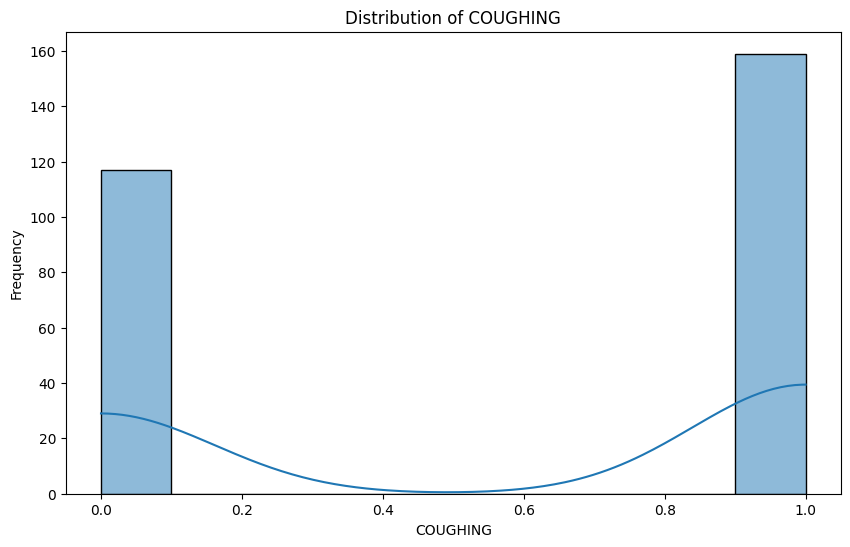

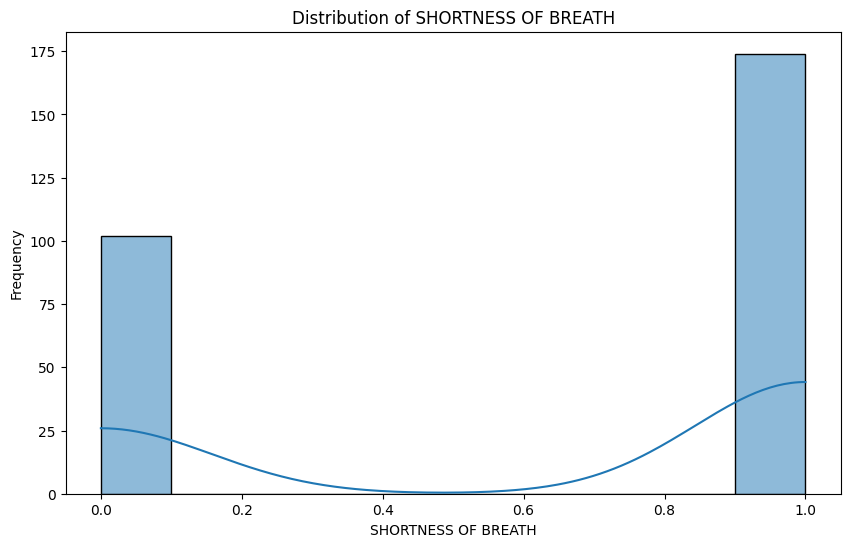

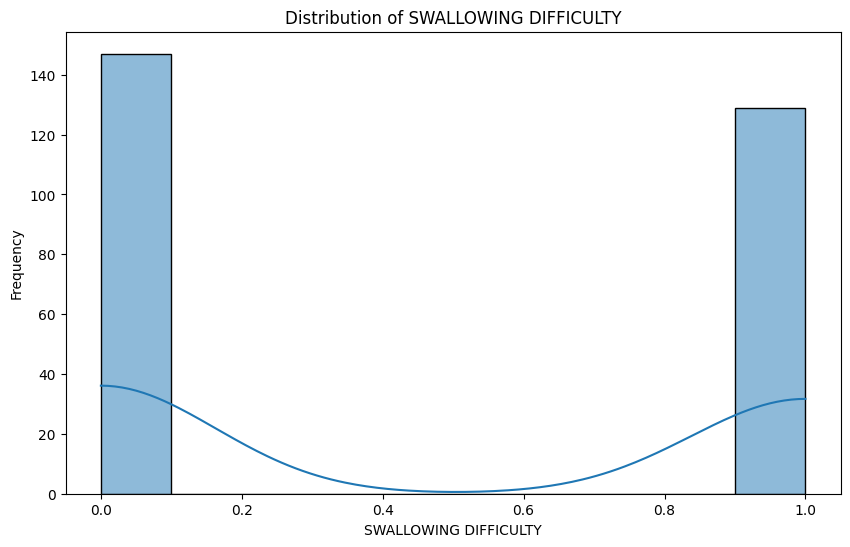

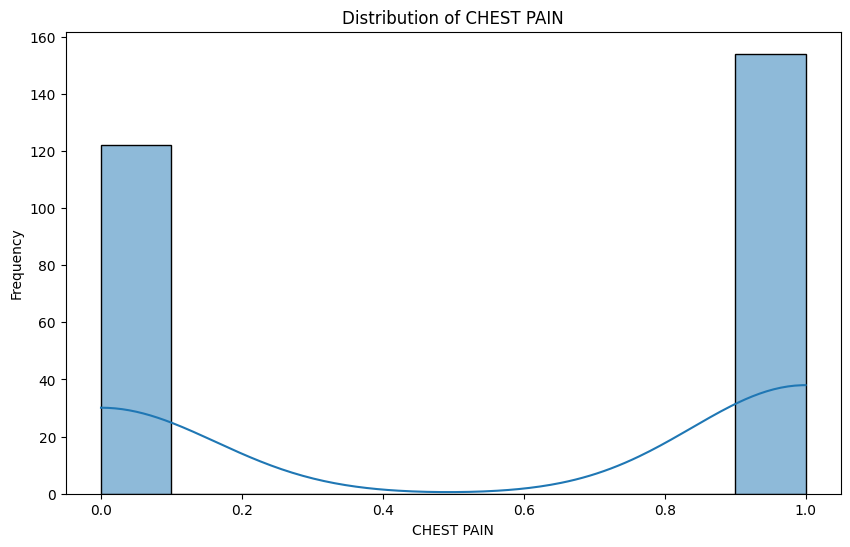

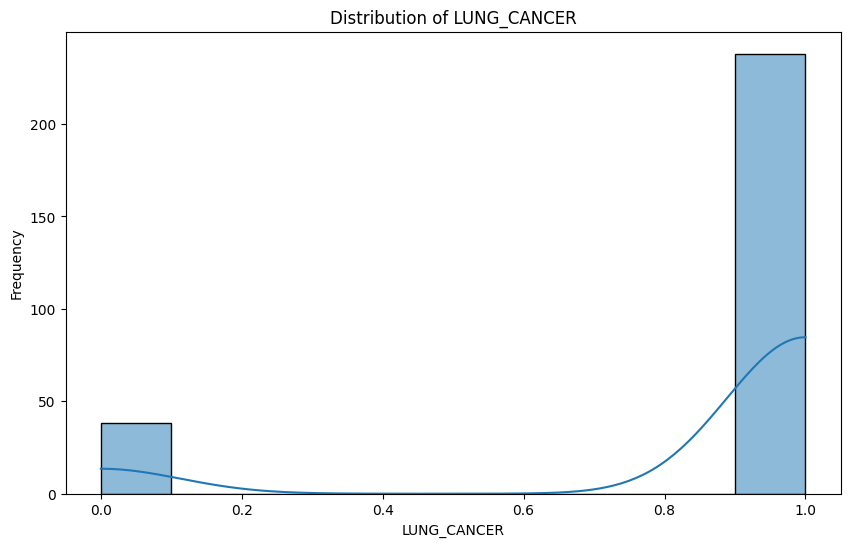

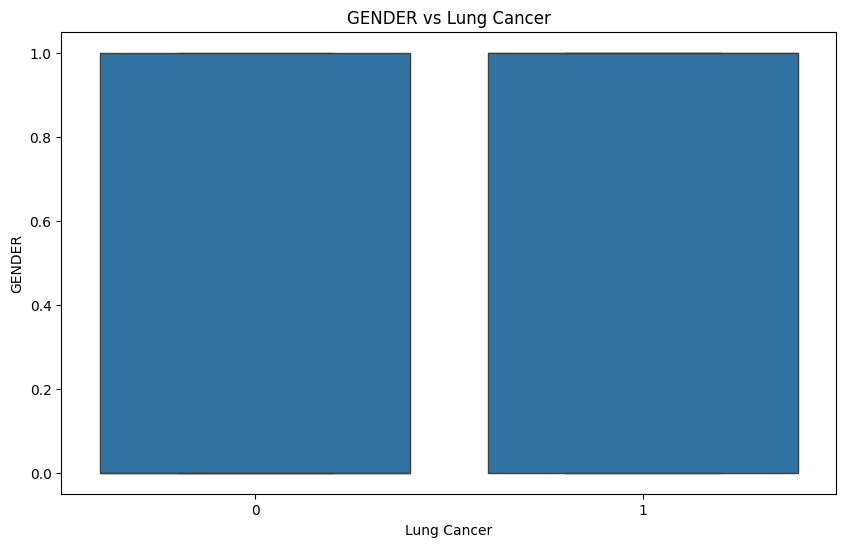

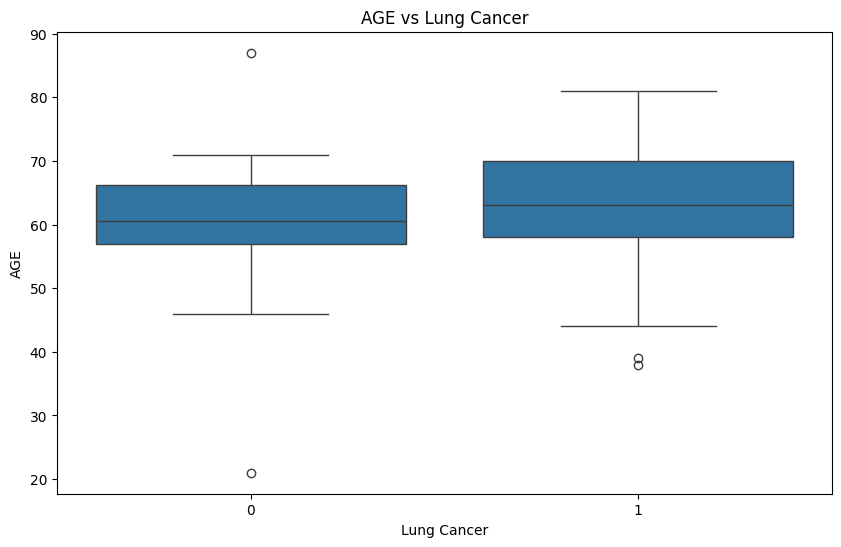

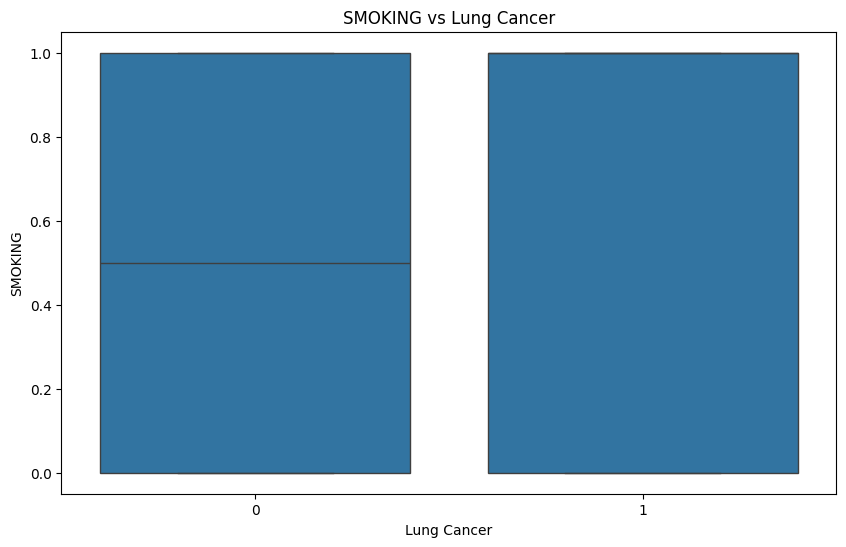

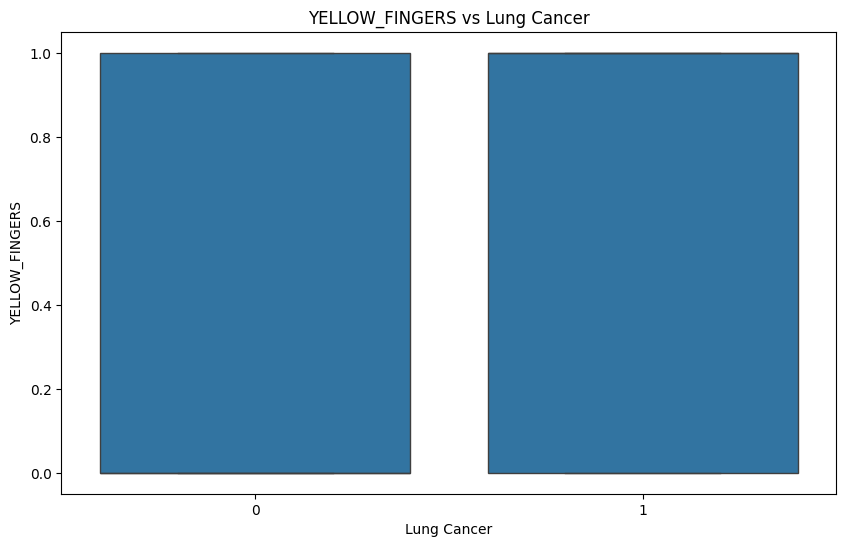

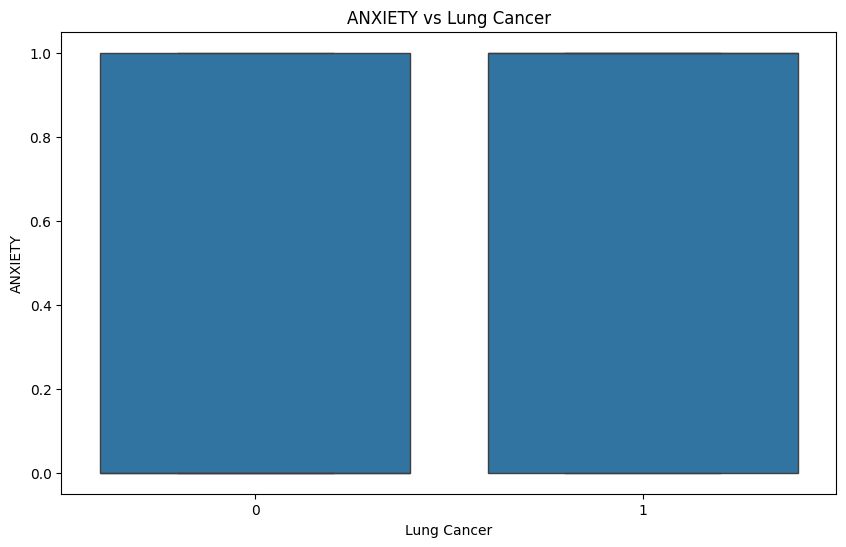

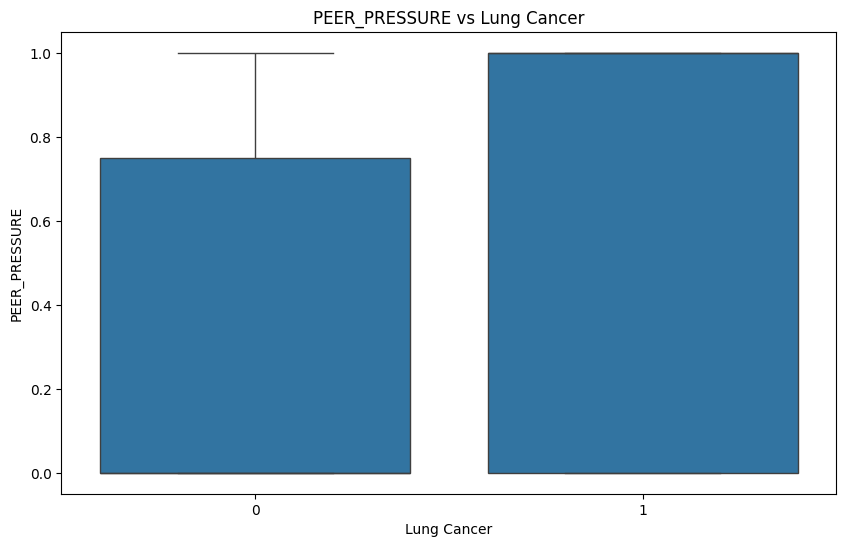

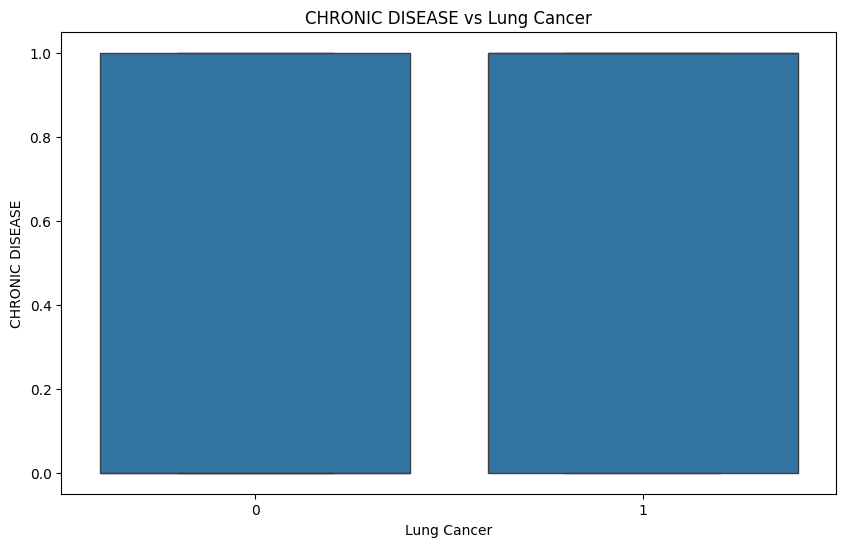

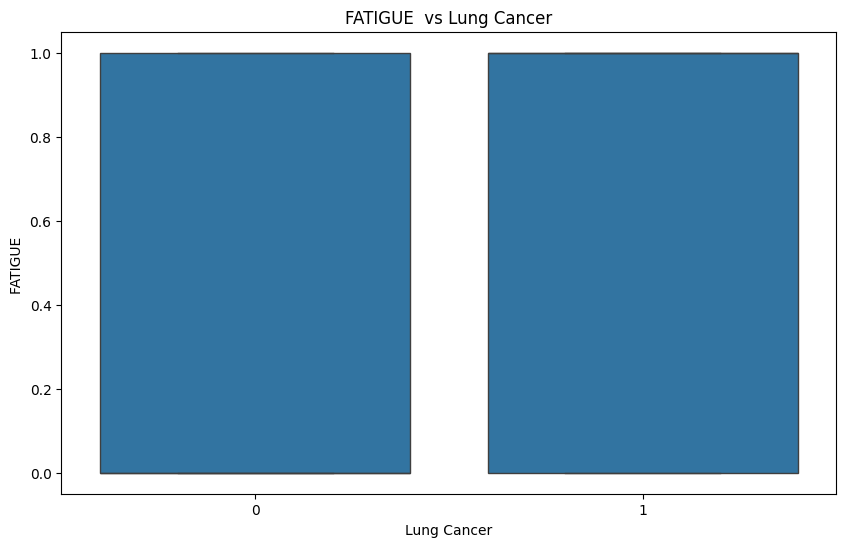

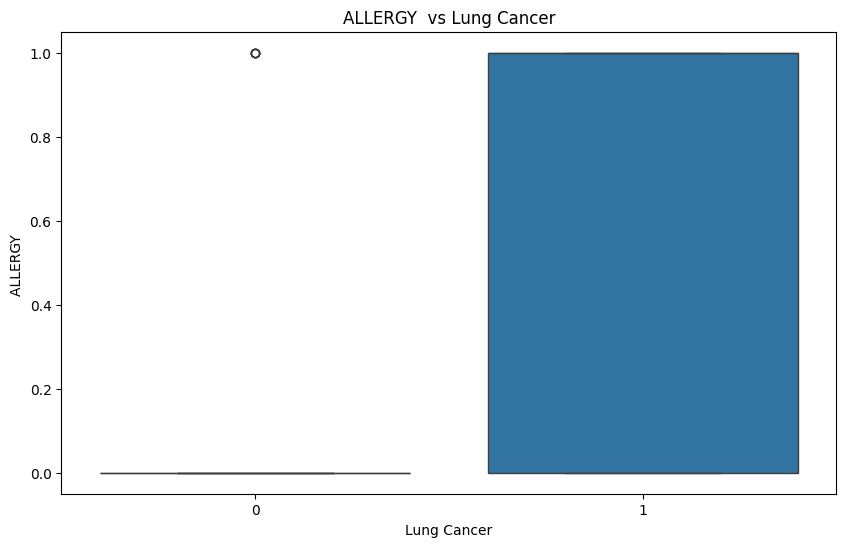

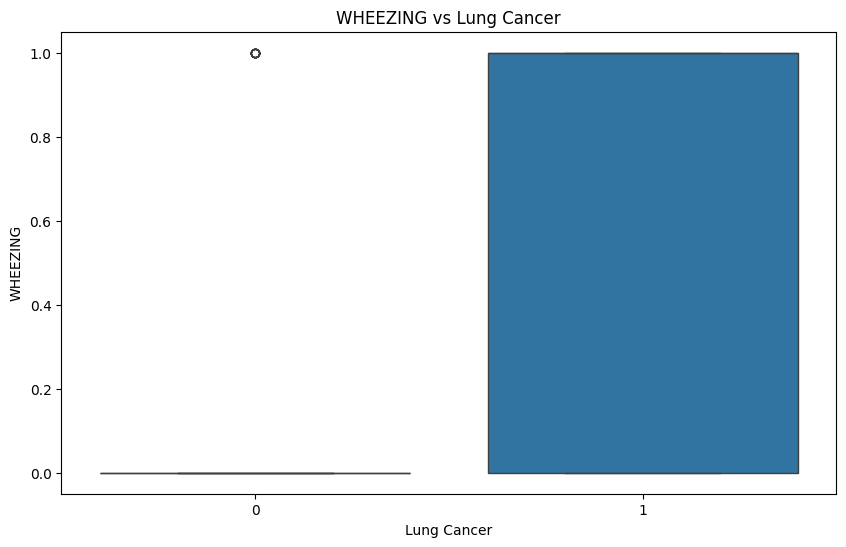

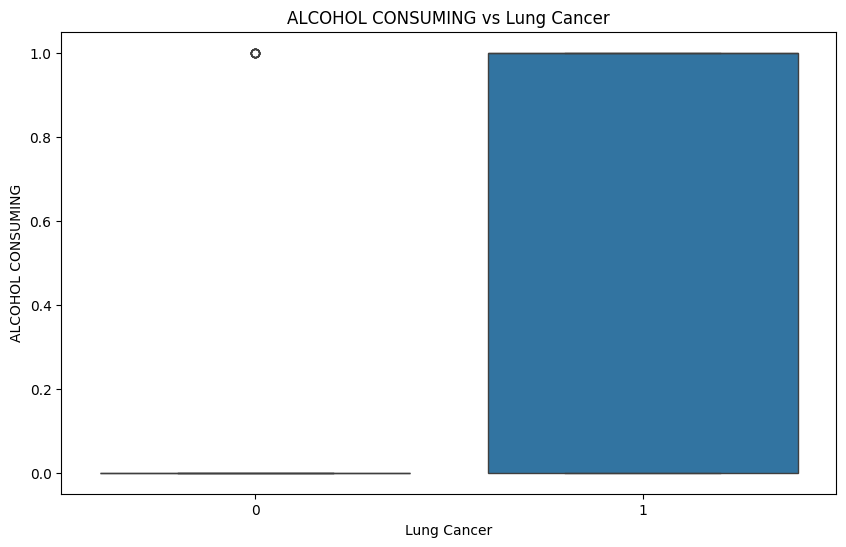

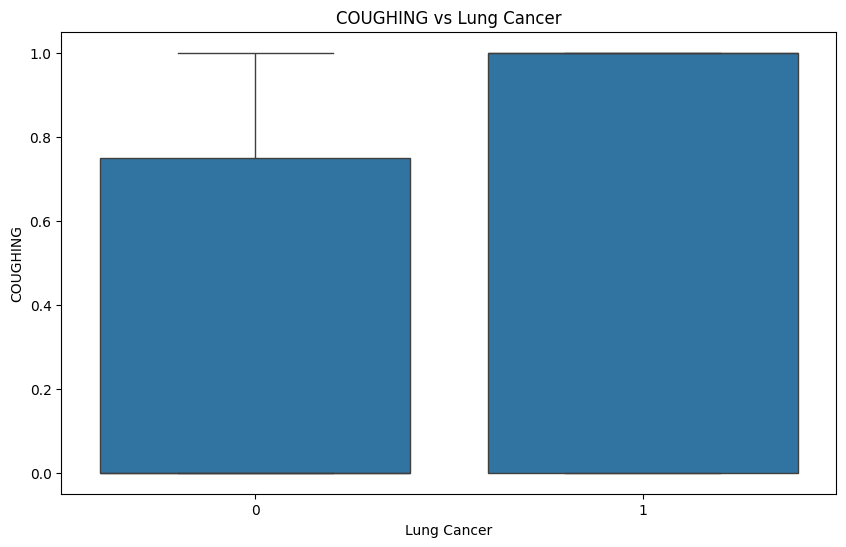

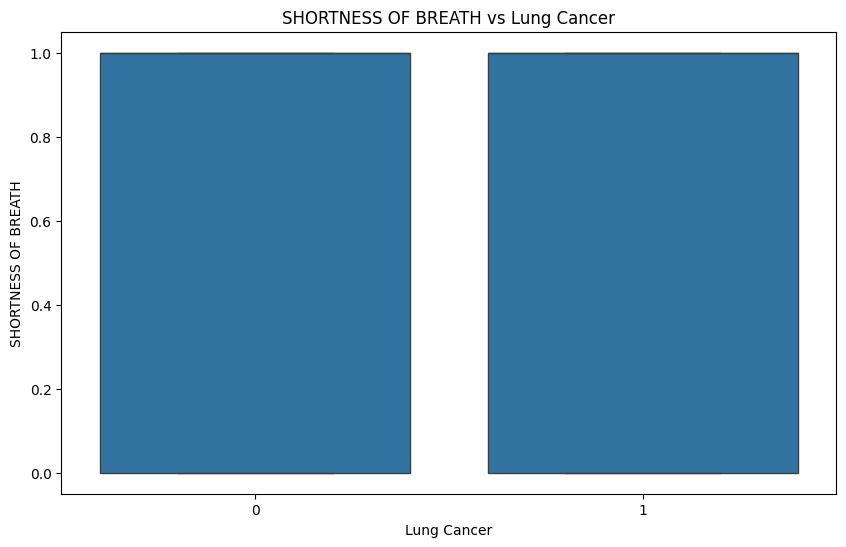

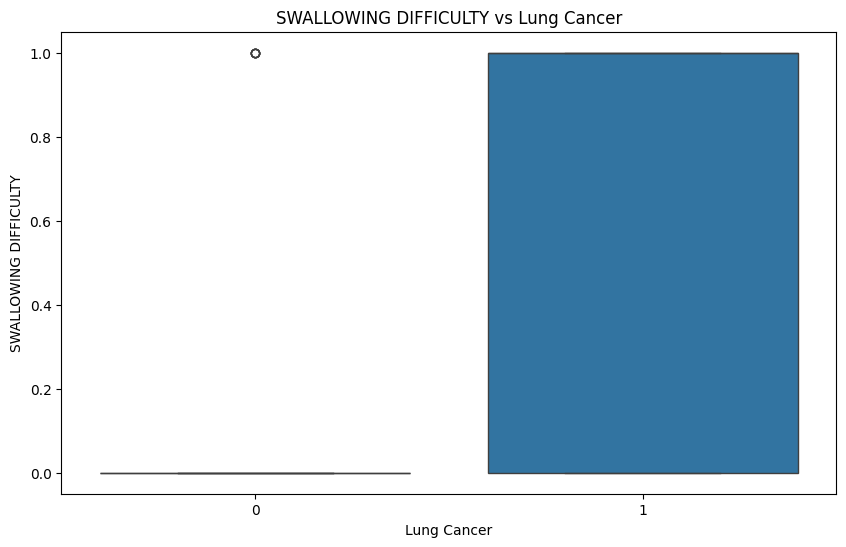

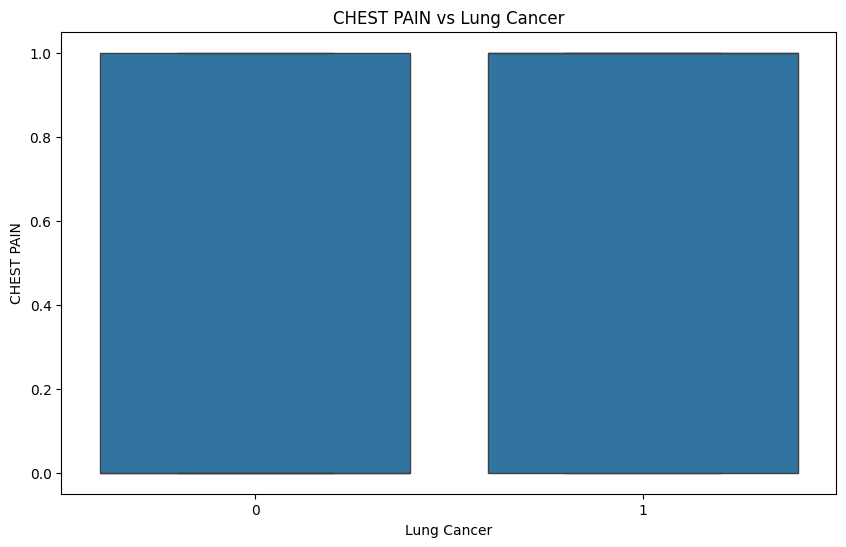

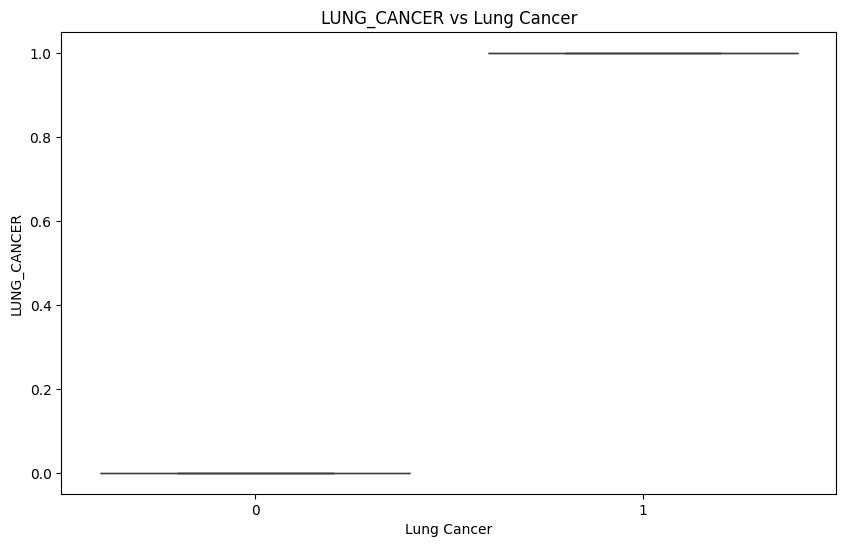

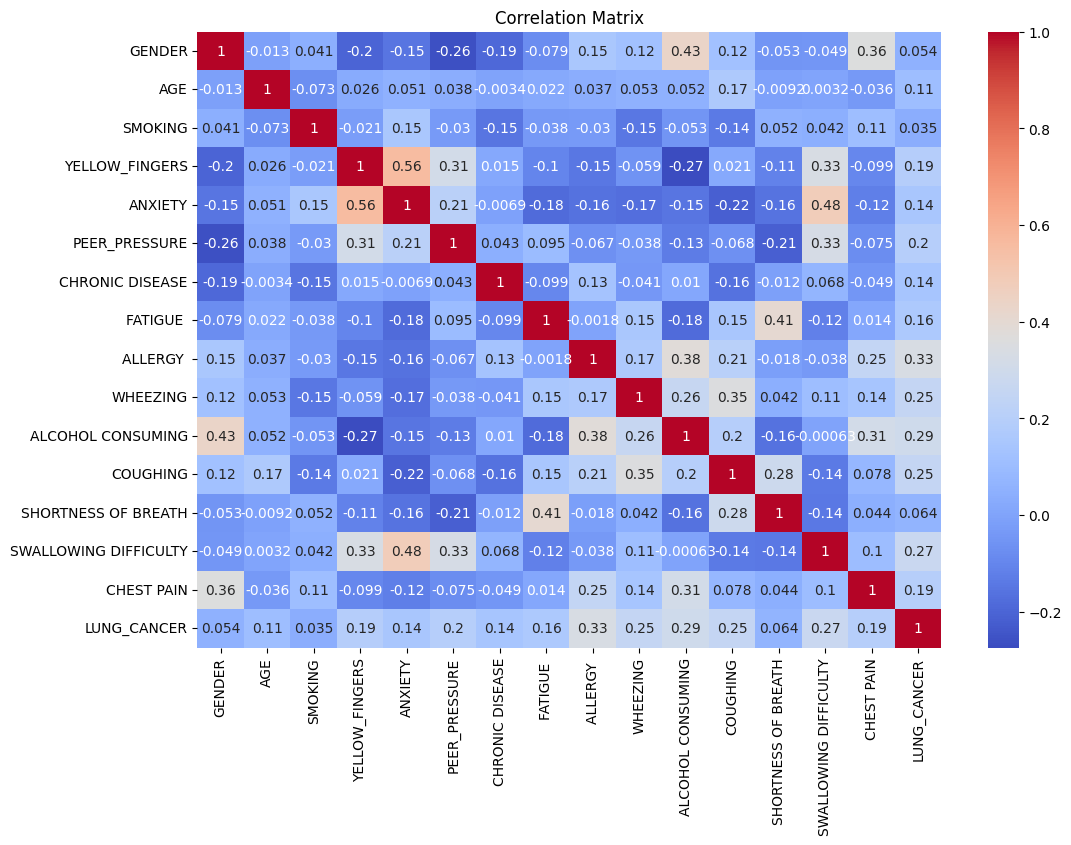

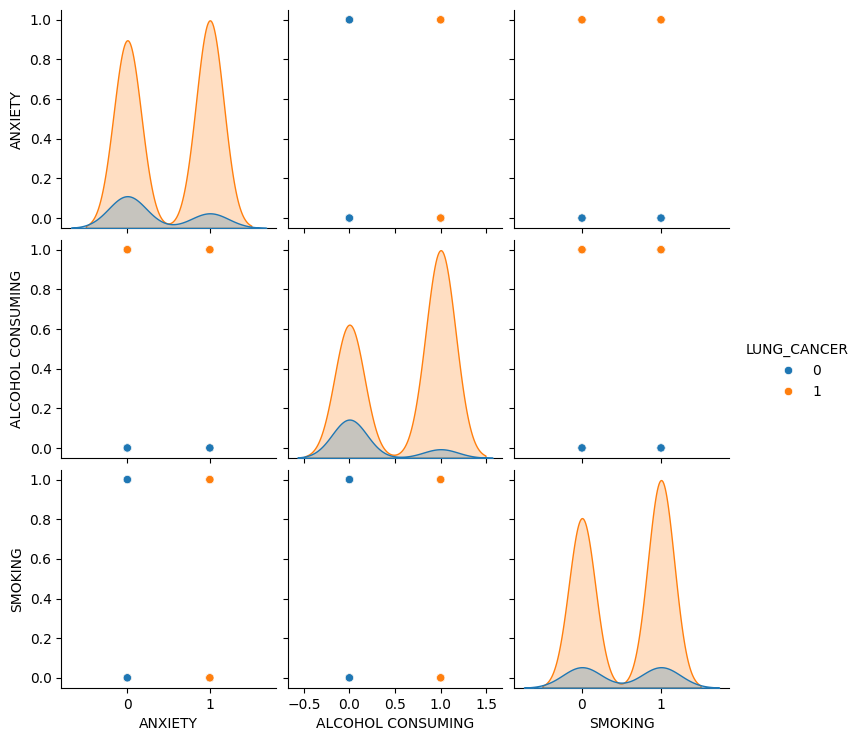

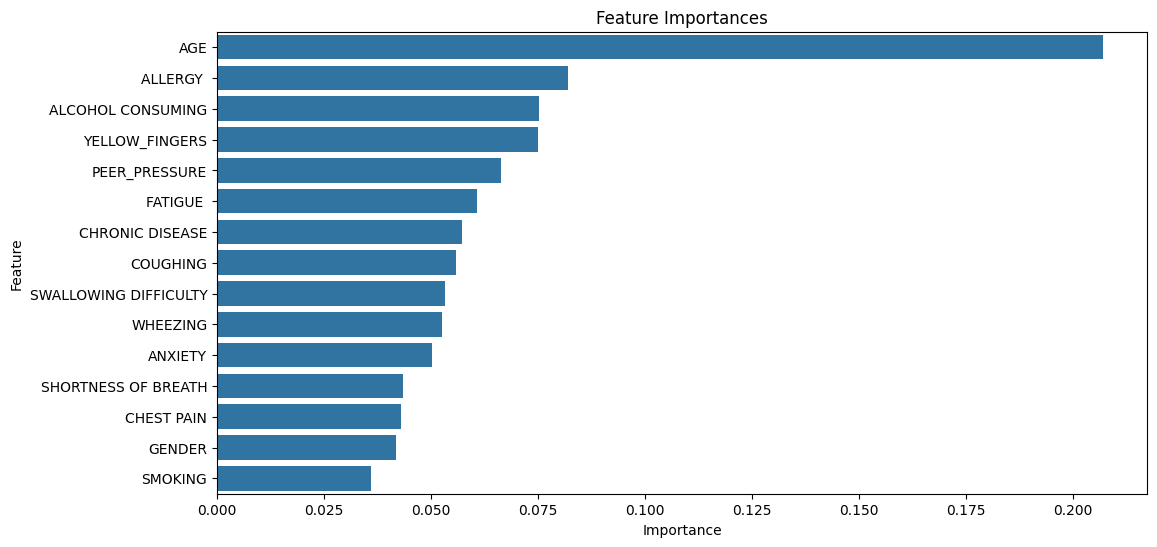

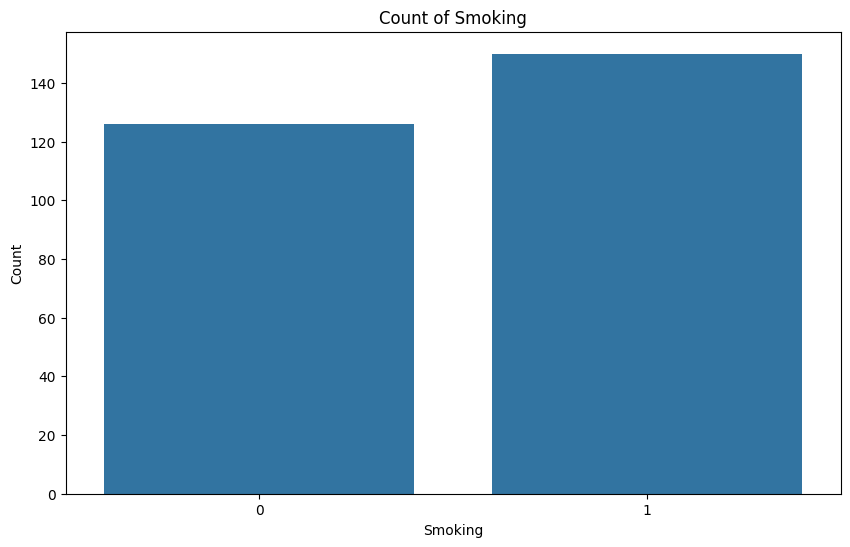

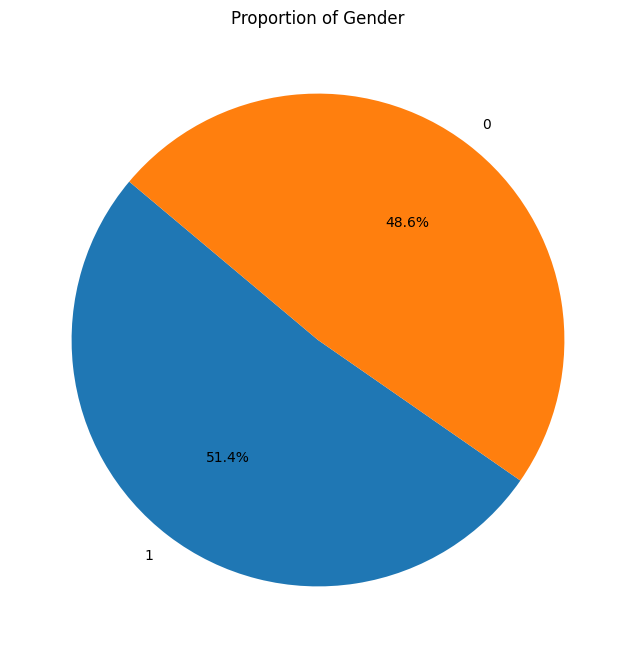

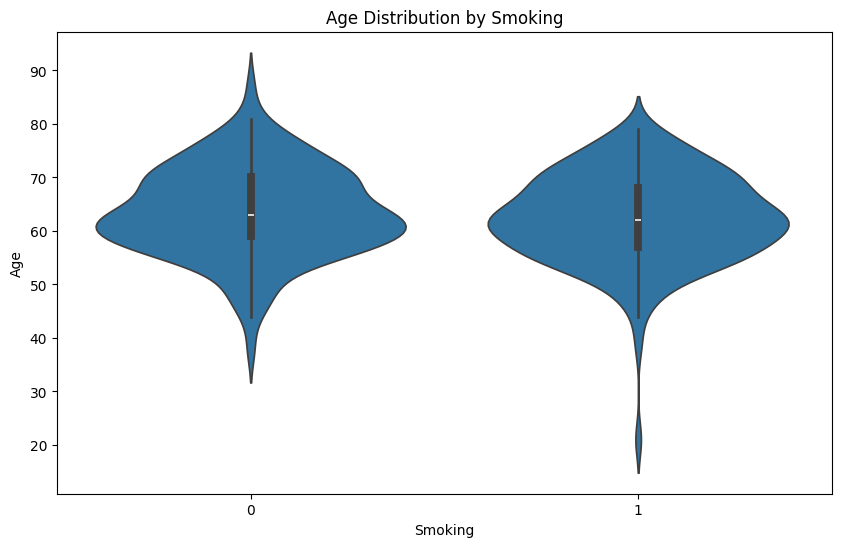

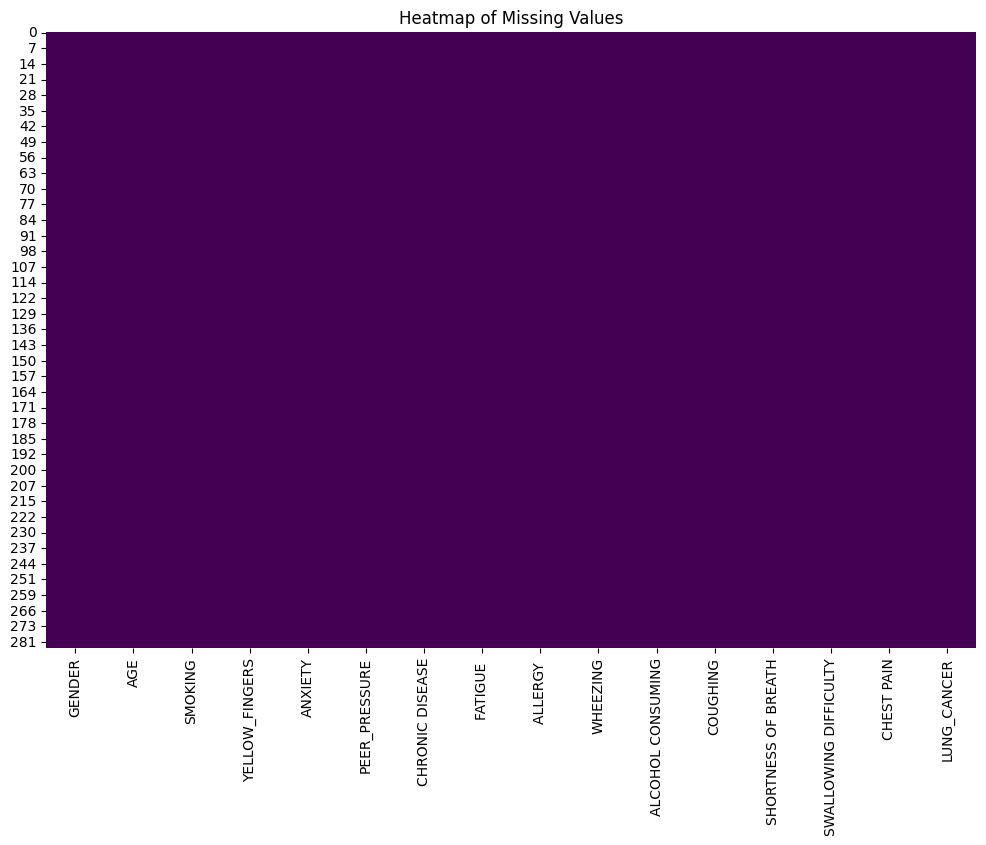

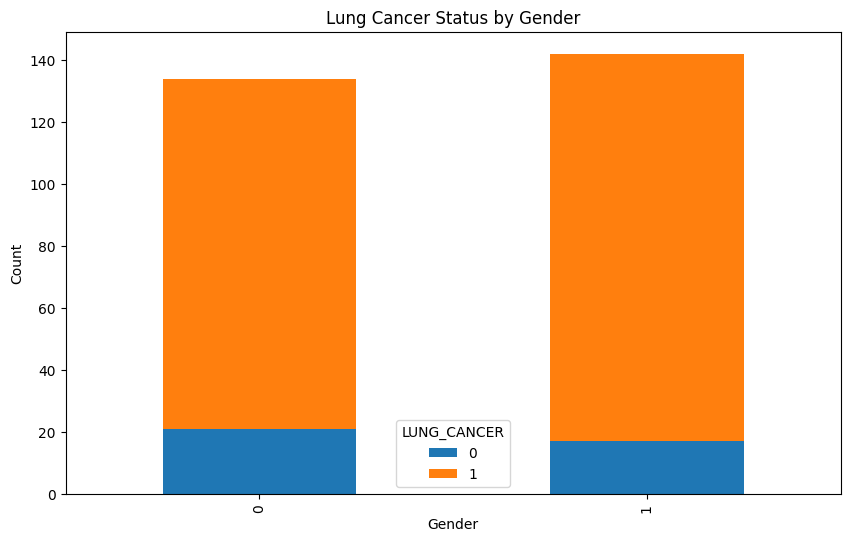

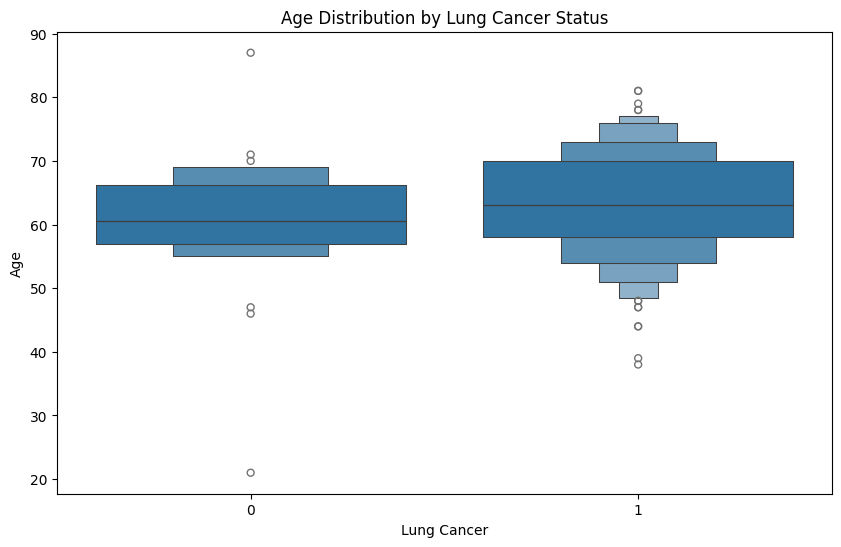

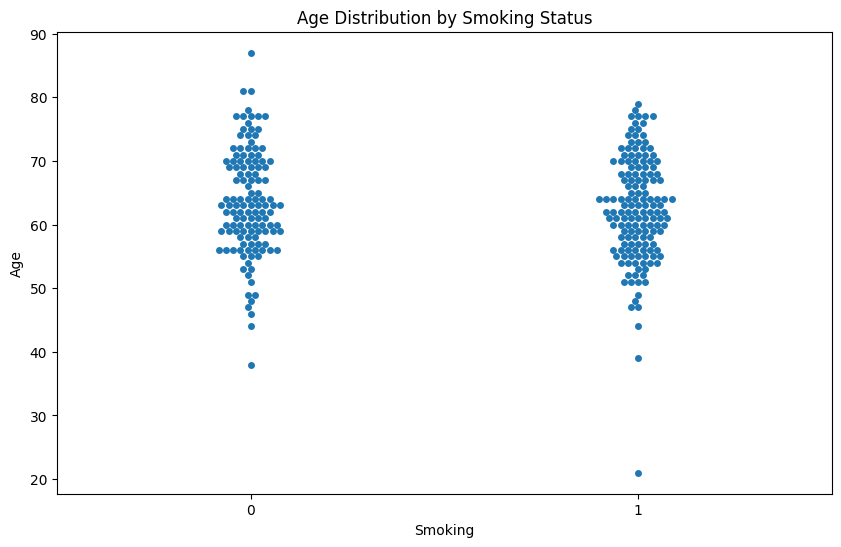

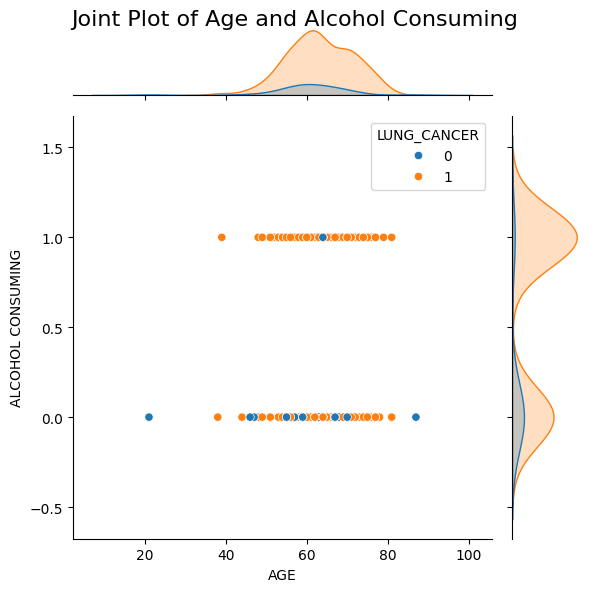

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('survey lung cancer.csv')

# Display the first few rows of the dataset

print("Head")
print(df.head())

# Get an overview of the dataset
print("Info")
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print("Stats:")
print(df.describe())

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values if necessary
df = df.dropna()

# Normalize categorical values to 0 & 1 using LabelEncoder
label_columns = ['GENDER', 'LUNG_CANCER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
                 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

le = preprocessing.LabelEncoder()
for column in label_columns:
    df[column] = le.fit_transform(df[column])



# EDA
# Check the distribution of the target variable
print("Check the distribution of the target variable")
print(df['LUNG_CANCER'].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()

# Check the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Check the relationship between features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='LUNG_CANCER', y=feature, data=df)
    plt.title(f'{feature} vs Lung Cancer')
    plt.xlabel('Lung Cancer')
    plt.ylabel(feature)
    plt.show()

# Visualization of insights
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['ANXIETY', 'ALCOHOL CONSUMING', 'SMOKING', 'LUNG_CANCER']
sns.pairplot(df[selected_features], hue='LUNG_CANCER')
plt.show()


# Feature importance using RandomForest
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Additional plots
# Bar plot for SMOKING variable
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKING', data=df)
plt.title('Count of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

# Pie chart for GENDER variable
gender_counts = df['GENDER'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Gender')
plt.show()

# Violin plot for AGE across SMOKING
plt.figure(figsize=(10, 6))
sns.violinplot(x='SMOKING', y='AGE', data=df)
plt.title('Age Distribution by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Age')
plt.show()

# Heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Stacked bar plot for LUNG_CANCER status across GENDER
gender_cancer_counts = df.groupby(['GENDER', 'LUNG_CANCER']).size().unstack()
gender_cancer_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Lung Cancer Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Boxen plot for AGE across LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.boxenplot(x='LUNG_CANCER', y='AGE', data=df)
plt.title('Age Distribution by Lung Cancer Status')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

# Swarm plot for SMOKING vs AGE
plt.figure(figsize=(10, 6))
sns.swarmplot(x='SMOKING', y='AGE', data=df)
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Age')
plt.show()

# Joint plot for AGE and another numerical feature
# sns.jointplot(x='AGE', y='ALCOHOL CONSUMING', data=df, kind='scatter', hue='LUNG_CANCER')
# plt.title('Joint Plot of Age and Alcohol Consuming')
# plt.show()

joint_plot = sns.jointplot(x='AGE', y='ALCOHOL CONSUMING', data=df, kind='scatter', hue='LUNG_CANCER')

# Adjust the position of the title
joint_plot.fig.suptitle('Joint Plot of Age and Alcohol Consuming', fontsize=16)
joint_plot.fig.tight_layout()
joint_plot.fig.subplots_adjust(top=0.95)